In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

df = pd.read_csv("/kaggle/input/datasets/thedrzee/top-selling-books-data2023-2025/best sellin books 2023.csv",
                 encoding="latin1")

df.head()


,id,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre
0,#1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,145747,Hardcover,$18.88,NaN,320.0,16/10/2018,Self-Improvement
1,#2,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7 out of 5 stars,395512,Hardcover,$11.05,NaN,640.0,07/11/2023,Fiction & Action & Adventure
2,#3,Spare,Prince Harry The Duke of Sussex,4.5 out of 5 stars,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs
3,#4,Fourth Wing,Rebecca Yarros,4.8 out of 5 stars,472618,Paperback,$13.62,NaN,544.0,17/09/2024,Fiction & Action & Adventure
4,#5,The Woman in Me,Britney Spears,4.4 out of 5 stars,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs


In [59]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               100 non-null    object 
 1   Book name        100 non-null    object 
 2   Author           100 non-null    object 
 3   Rating           100 non-null    object 
 4   reviews count    100 non-null    int64  
 5   form             100 non-null    object 
 6   price            100 non-null    object 
 7   Reading age      30 non-null     object 
 8   Print Length     98 non-null     float64
 9   Publishing date  100 non-null    object 
 10  Genre            100 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


,reviews count,Print Length
count,100.000000,98.000000
mean,111732.840000,361.224490
std,123318.545255,330.746688
min,3296.000000,24.000000
25%,26167.750000,208.000000
50%,77085.000000,344.000000
75%,129235.750000,448.000000
max,653111.000000,2896.000000


In [60]:
df["id"] = df["id"].str.replace("#", "", regex=False)
df["id"] = pd.to_numeric(df["id"], errors="coerce")

df["Rating"] = df["Rating"].str.extract(r"(\d+\.\d+)")
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

df["price"] = df["price"].str.replace("$", "", regex=False)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

df["reviews count"] = pd.to_numeric(df["reviews count"], errors="coerce")

df["Publishing date"] = pd.to_datetime(
    df["Publishing date"],
    errors="coerce",
    dayfirst=True
)
df["Year"] = df["Publishing date"].dt.year

df["Genre"] = df["Genre"].str.strip()

df = df.drop(columns=["Reading age"])


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               100 non-null    int64         
 1   Book name        100 non-null    object        
 2   Author           100 non-null    object        
 3   Rating           100 non-null    float64       
 4   reviews count    100 non-null    int64         
 5   form             100 non-null    object        
 6   price            100 non-null    float64       
 7   Print Length     98 non-null     float64       
 8   Publishing date  42 non-null     datetime64[ns]
 9   Genre            100 non-null    object        
 10  Year             42 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 8.7+ KB


# Rating Distribution

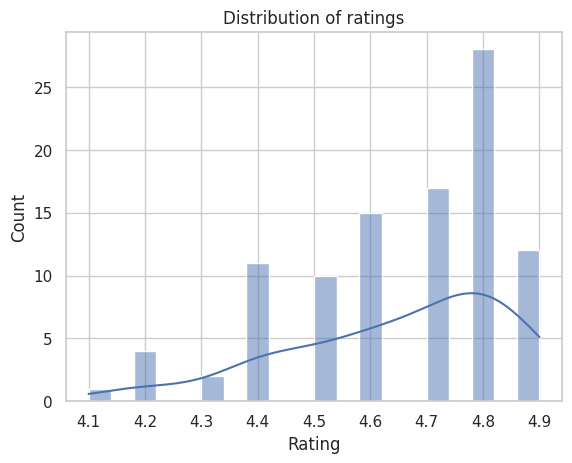

In [62]:
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of ratings")
plt.show()

# Price distribution

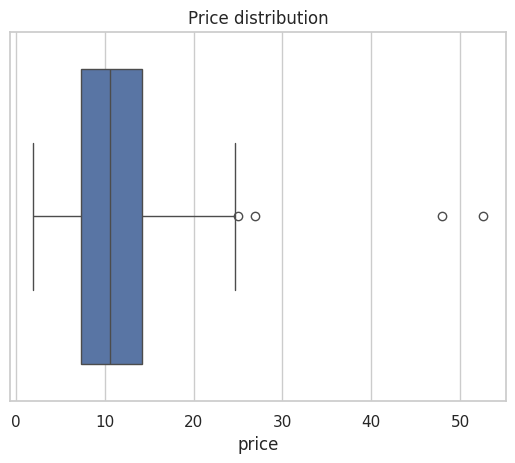

In [63]:
sns.boxplot(x=df["price"])
plt.title("Price distribution")
plt.show()

# Reviews vs Rating

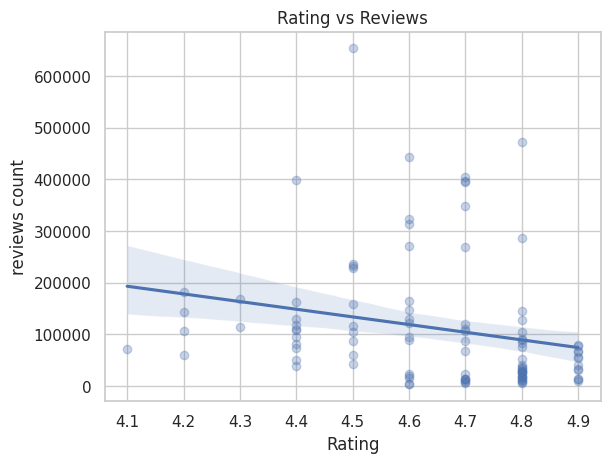

In [64]:
sns.regplot(data = df, x= "Rating", y="reviews count", scatter_kws = {"alpha":0.3})
plt.title("Rating vs Reviews")
plt.show()

# Price vs Reviews

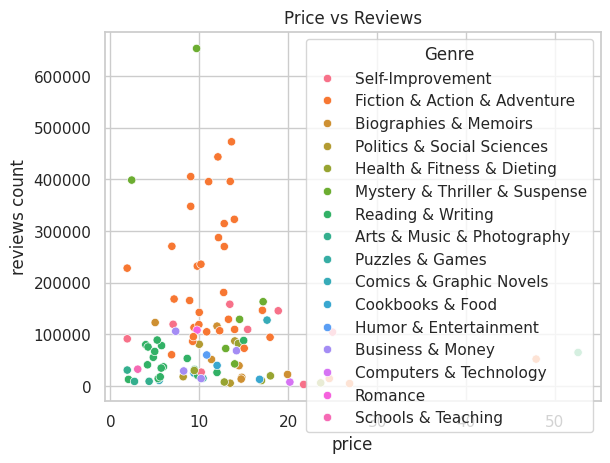

In [65]:
sns.scatterplot(data = df, x="price", y="reviews count", hue="Genre")

plt.title("Price vs Reviews")
plt.show()

# Correlation Matrix

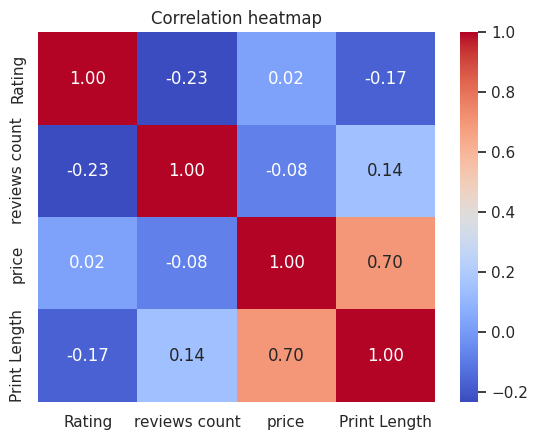

In [66]:
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm", fmt = ".2f")
plt.title("Correlation heatmap")
plt.show()